In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
studio_and_budgets = pd.read_csv('studio_and_budget.csv') #Uploaded the dataframe
studio_and_budgets

,title,studio,domestic_gross,foreign_gross,year,id,production_budget
0,Toy Story 3,BV,415000000.0,652000000,2010.0,47.0,"$200,000,000"
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010.0,NaN,NaN
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010.0,NaN,NaN
3,Inception,WB,292600000.0,535700000,2010.0,38.0,"$160,000,000"
4,Shrek Forever After,P/DW,238700000.0,513900000,2010.0,27.0,"$165,000,000"
...,...,...,...,...,...,...,...
7926,Red 11,NaN,NaN,NaN,NaN,78.0,"$7,000"
7927,Following,NaN,NaN,NaN,NaN,79.0,"$6,000"
7928,Return to the Land of Wonders,NaN,NaN,NaN,NaN,80.0,"$5,000"
7929,A Plague So Pleasant,NaN,NaN,NaN,NaN,81.0,"$1,400"


In [3]:
gross_and_prod = studio_and_budgets.dropna(subset=['domestic_gross', 'foreign_gross', 'production_budget'])

#I decided to drop the NA values in the domestic gross, foriegn gross, and production budget in order to be able to use the 
#data given more effectively


In [4]:
gross_and_prod.sort_values(by=["production_budget"], ascending=False).head(10)
#production budget isnt sorting correctly

,title,studio,domestic_gross,foreign_gross,year,id,production_budget
20,Robin Hood,Uni.,105300000.0,216400000,2010.0,9.0,"$99,000,000"
1908,The Peanuts Movie,Fox,130199999.0,116100000,2015.0,7.0,"$99,000,000"
2807,Alien: Covenant,Fox,74300000.0,166600000,2017.0,12.0,"$97,000,000"
1268,Trance,FoxS,2300000.0,21900000,2013.0,31.0,"$950,000"
26,Sex and the City 2,WB (NL),95300000.0,193000000,2010.0,16.0,"$95,000,000"
795,The Campaign,WB,86900000.0,18000000,2012.0,18.0,"$95,000,000"
1937,Seventh Son,Uni.,17200000.0,97000000,2015.0,24.0,"$95,000,000"
45,Unstoppable,Fox,81600000.0,86200000,2010.0,19.0,"$95,000,000"
735,Ice Age: Continental Drift,Fox,161300000.0,715900000,2012.0,14.0,"$95,000,000"
1896,Kingsman: The Secret Service,Fox,128300000.0,286100000,2015.0,29.0,"$94,000,000"


In [5]:
gross_and_prod.info()# I noticed that production budget is still an object

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1084 entries, 0 to 3280
Data columns (total 7 columns):
title                1084 non-null object
studio               1083 non-null object
domestic_gross       1084 non-null float64
foreign_gross        1084 non-null object
year                 1084 non-null float64
id                   1084 non-null float64
production_budget    1084 non-null object
dtypes: float64(3), object(4)
memory usage: 67.8+ KB


In [6]:
def clean_currency(x):# I'm going to use this function to clean out the string
  
    if isinstance(x, str):
        return(x.replace('$', '').replace(',', ''))
    return(x)

In [7]:
gross_and_prod['production_budget'] = gross_and_prod['production_budget'].apply(clean_currency).astype('float')
gross_and_prod
#Applied it to the production column and switched it to a float

C:\Users\eduar\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,title,studio,domestic_gross,foreign_gross,year,id,production_budget
0,Toy Story 3,BV,415000000.0,652000000,2010.0,47.0,200000000.0
3,Inception,WB,292600000.0,535700000,2010.0,38.0,160000000.0
4,Shrek Forever After,P/DW,238700000.0,513900000,2010.0,27.0,165000000.0
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010.0,53.0,68000000.0
6,Iron Man 2,Par.,312400000.0,311500000,2010.0,15.0,170000000.0
...,...,...,...,...,...,...,...
3229,Hotel Artemis,Global Road,6700000.0,6000000,2018.0,15.0,15000000.0
3238,Kin,LGF,5700000.0,4300000,2018.0,88.0,30000000.0
3245,Suspiria,Amazon,2500000.0,5400000,2018.0,81.0,20000000.0
3256,Destroyer,Annapurna,1500000.0,4000000,2018.0,5.0,9000000.0


In [8]:
gross_and_prod.info()# Much better. Now I have to change the foreign column to a float

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1084 entries, 0 to 3280
Data columns (total 7 columns):
title                1084 non-null object
studio               1083 non-null object
domestic_gross       1084 non-null float64
foreign_gross        1084 non-null object
year                 1084 non-null float64
id                   1084 non-null float64
production_budget    1084 non-null float64
dtypes: float64(4), object(3)
memory usage: 67.8+ KB


In [9]:
gross_and_prod['foreign_gross'] = gross_and_prod['foreign_gross'].apply(clean_currency).astype('float')

C:\Users\eduar\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
gross_and_prod.info() #corrected the foreign column

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1084 entries, 0 to 3280
Data columns (total 7 columns):
title                1084 non-null object
studio               1083 non-null object
domestic_gross       1084 non-null float64
foreign_gross        1084 non-null float64
year                 1084 non-null float64
id                   1084 non-null float64
production_budget    1084 non-null float64
dtypes: float64(5), object(2)
memory usage: 67.8+ KB


In [11]:
gross_and_prod.sort_values(by=["production_budget"], ascending=False)
print(gross_and_prod)

                           title       studio  domestic_gross  foreign_gross  \
0                    Toy Story 3           BV     415000000.0    652000000.0   
3                      Inception           WB     292600000.0    535700000.0   
4            Shrek Forever After         P/DW     238700000.0    513900000.0   
5     The Twilight Saga: Eclipse         Sum.     300500000.0    398000000.0   
6                     Iron Man 2         Par.     312400000.0    311500000.0   
...                          ...          ...             ...            ...   
3229               Hotel Artemis  Global Road       6700000.0      6000000.0   
3238                         Kin          LGF       5700000.0      4300000.0   
3245                    Suspiria       Amazon       2500000.0      5400000.0   
3256                   Destroyer    Annapurna       1500000.0      4000000.0   
3280  Bilal: A New Breed of Hero           VE        491000.0      1700000.0   

        year     id  production_budget 

In [12]:
gross_and_prod['profitability'] = (gross_and_prod['domestic_gross'] + gross_and_prod['foreign_gross']) - gross_and_prod['production_budget']
gross_and_prod.head()#I added domestic and foriegn then subtracted the sum by product budget to come up with the profitability column

C:\Users\eduar\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,title,studio,domestic_gross,foreign_gross,year,id,production_budget,profitability
0,Toy Story 3,BV,415000000.0,652000000.0,2010.0,47.0,200000000.0,867000000.0
3,Inception,WB,292600000.0,535700000.0,2010.0,38.0,160000000.0,668300000.0
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010.0,27.0,165000000.0,587600000.0
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010.0,53.0,68000000.0,630500000.0
6,Iron Man 2,Par.,312400000.0,311500000.0,2010.0,15.0,170000000.0,453900000.0


In [13]:
unique_titles = gross_and_prod['title'].nunique()
print(unique_titles)# there are 7 duplicate titles

1077


In [14]:
gross_and_prod = gross_and_prod.drop_duplicates(subset='title', keep="first")
print(gross_and_prod) #no more duplicate titles

                           title       studio  domestic_gross  foreign_gross  \
0                    Toy Story 3           BV     415000000.0    652000000.0   
3                      Inception           WB     292600000.0    535700000.0   
4            Shrek Forever After         P/DW     238700000.0    513900000.0   
5     The Twilight Saga: Eclipse         Sum.     300500000.0    398000000.0   
6                     Iron Man 2         Par.     312400000.0    311500000.0   
...                          ...          ...             ...            ...   
3229               Hotel Artemis  Global Road       6700000.0      6000000.0   
3238                         Kin          LGF       5700000.0      4300000.0   
3245                    Suspiria       Amazon       2500000.0      5400000.0   
3256                   Destroyer    Annapurna       1500000.0      4000000.0   
3280  Bilal: A New Breed of Hero           VE        491000.0      1700000.0   

        year     id  production_budget 

In [15]:
highest_profit = gross_and_prod.sort_values(by=["profitability"], ascending=False).head(100)

In [16]:
highest_profit.to_csv('profitability.csv')

In [17]:
 pd.set_option('float_format', '{:f}'.format)
# I added this line in to show entire numbers instead of numbers ^x. 
#It seemed to adjusted it the everything even before this line.

In [18]:
highest_profit.head(30)

,title,studio,domestic_gross,foreign_gross,year,id,production_budget,profitability
3089,Black Panther,BV,700100000.000000,646900000.000000,2018.000000,42.000000,200000000.000000,1147000000.000000
3090,Jurassic World: Fallen Kingdom,Uni.,417700000.000000,891800000.000000,2018.000000,13.000000,170000000.000000,1139500000.000000
1131,Frozen,BV,400700000.000000,875700000.000000,2013.000000,56.000000,150000000.000000,1126400000.000000
1883,Minions,Uni.,336000000.000000,823400000.000000,2015.000000,73.000000,74000000.000000,1085400000.000000
1882,Avengers: Age of Ultron,BV,459000000.000000,946400000.000000,2015.000000,4.000000,330600000.000000,1074800000.000000
3091,Incredibles 2,BV,608600000.000000,634200000.000000,2018.000000,44.000000,200000000.000000,1042800000.000000
1132,Iron Man 3,BV,409000000.000000,805800000.000000,2013.000000,48.000000,200000000.000000,1014800000.000000
3092,Aquaman,WB,335100000.000000,812700000.000000,2018.000000,36.000000,160000000.000000,987800000.000000
2770,Despicable Me 3,Uni.,264600000.000000,770200000.000000,2017.000000,30.000000,75000000.000000,959800000.000000
332,Transformers: Dark of the Moon,P/DW,352400000.000000,771400000.000000,2011.000000,64.000000,195000000.000000,928800000.000000


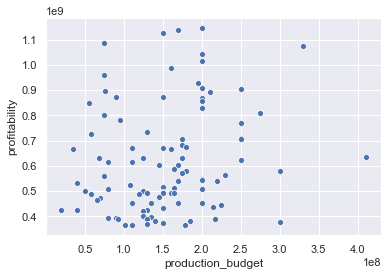

In [19]:
import seaborn as sns

sns.set()


sns.scatterplot(x="production_budget", y="profitability",
           data=highest_profit);

<Figure size 5760x2160 with 0 Axes>

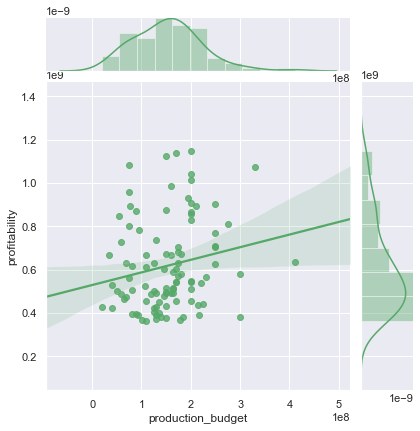

In [20]:
plt.figure(figsize=(80,30))
sns.jointplot(data=highest_profit, x='production_budget', y='profitability', kind='reg', color='g')
plt.show()

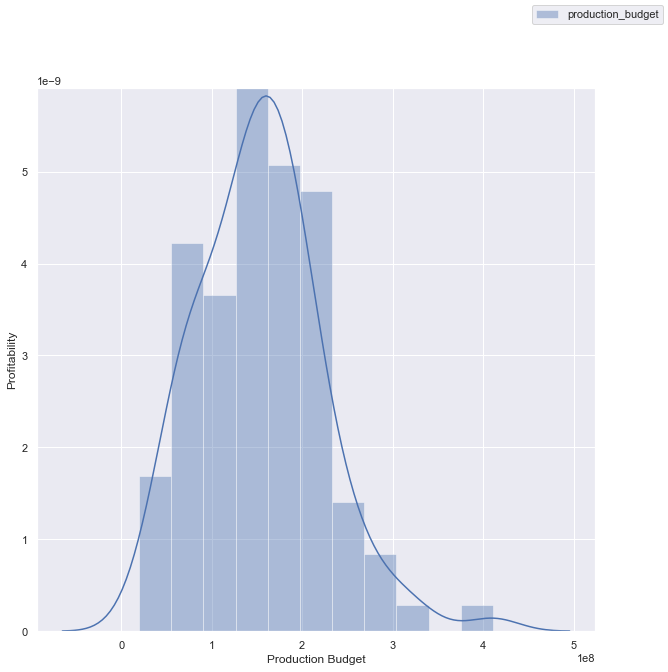

In [22]:
fig = plt.figure(figsize=(10,10))
ax = sns.distplot(highest_profit["production_budget"].head(100))
;

fig.legend(labels=['production_budget','profitability'])
ax.set(xlabel='Production Budget', ylabel='Profitability')
plt.show()